In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SuspensionParts import Wishbone
from SuspensionParts import Upright
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

[ 1.8 -0.4  0.6]
[ 5.000000e-01 -3.061617e-17  5.000000e-01]


In [2]:
# define chassis pickup points
# origin at center of rear axle on ground
# F/R - front/rear of car
# r/l - right/left
# U/L - upper/lower
# 1/2/3 - 1=front/2=rear/3=upright of the specific wishbone

# Should make control arm and upright classes to make this easier

x1 = np.array([1,0,0])
x2 = np.array([0,0,0])
x3 = np.array([.5,-.5,0])

test_wishbone = Wishbone(x1, x2, x3)

# front right corner
# upper
FrU1 = np.array([1.9,-.4,.4])
FrU2 = np.array([1.7,-.4,.4])
FrU3 = np.array([1.8,-.6,.4])

# lower
FrL1 = np.array([1.9,-.4,.2])
FrL2 = np.array([1.7,-.4,.2])
FrL3 = np.array([1.8,-.6,.2])

FR_upper = Wishbone(FrU1, FrU2, FrU3)
FR_lower = Wishbone(FrL1, FrL2, FrL3)

# front right upright
# joint_dist = .5
# define coords for ball joints and toe link so u can apply the same axis/ rotation checks to find 
# how far the upright rotated
# also define axle somehow to do same kind of math for wheel angles

In [3]:
theta = np.deg2rad(-90)
# print(theta)
print(FR_upper.rotation(theta))
print(test_wishbone.rotation(theta))

[ 1.8 -0.4  0.6]
[ 5.000000e-01 -3.061617e-17  5.000000e-01]


In [18]:
dtheta = np.deg2rad(1)
theta_total = 0
max_angle = np.deg2rad(90)
steps = int(max_angle / dtheta)

balljoint_pos = np.zeros((steps, 3))

for i in range(steps):
    balljoint_pos[i] = test_wishbone.rotation(theta_total)       
    theta_total += dtheta

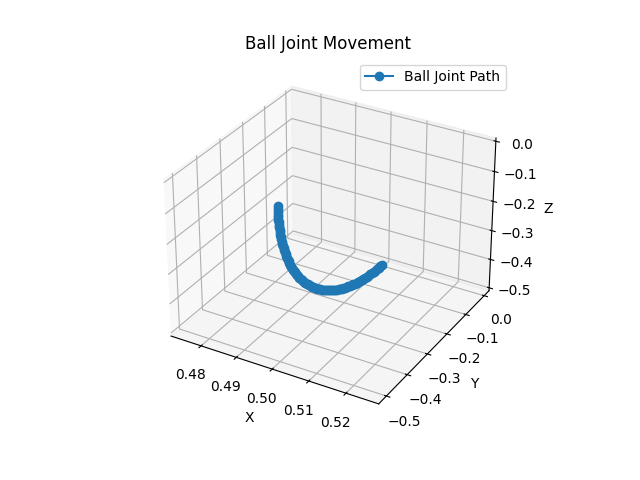

90


In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Unpack x, y, z from balljoint_pos
x = balljoint_pos[:, 0]
y = balljoint_pos[:, 1]
z = balljoint_pos[:, 2]

# Plot the points
ax.plot3D(x, y, z, 'o-', label='Ball Joint Path')  # 'o-' for points connected with lines
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ball Joint Movement')
ax.legend()
plt.show()

print(len(y))


In [25]:
FR_upper = Wishbone(FrU1, FrU2, FrU3)
FR_lower = Wishbone(FrL1, FrL2, FrL3)
joint_dist = .2
# theta_start_lower = np.deg2rad(-5)
upper_pos = FR_upper.rotation(np.deg2rad(5))
# lower_pos = FR_lower.rotation(theta_start_lower)

dtheta = np.deg2rad(0.01)
max_angle = np.deg2rad(360)
steps = int(max_angle/dtheta)

theta = 0
closest_dist = 10
theta_close = 0

for i in range(steps):
    lower_pos = FR_lower.rotation(theta)
    dist = np.linalg.norm(upper_pos - lower_pos)
    theta += dtheta
    
    if (np.abs(dist-joint_dist)) < closest_dist:
        closest_dist = dist
        theta_close = theta

rotation_needed = np.rad2deg(theta_close)
print(rotation_needed)
print(closest_dist)
FR_lower = Wishbone(FrL1, FrL2, FrL3)
lower_pos = FR_lower.rotation(theta_close)
print(lower_pos)
print(upper_pos)



359.9999999999782
0.18253553143549892
[ 1.8 -0.6  0.2]
[ 1.8        -0.59923894  0.38256885]


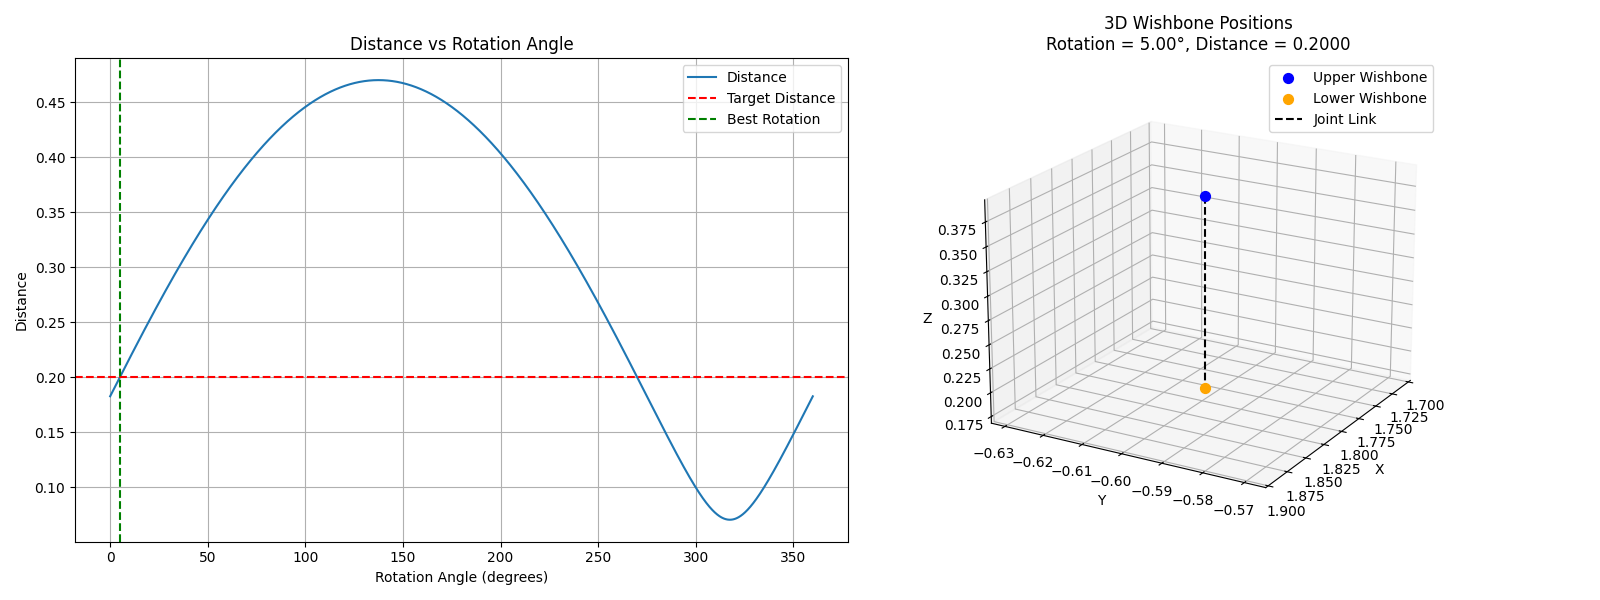

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

# Data collection for plotting
theta_vals = []
distance_vals = []

# Reset variables
theta = 0
closest_dist = 10
theta_close = 0

# Sweep rotation and track distances
for i in range(steps):
    lower_pos = FR_lower.rotation(theta)
    dist = np.linalg.norm(upper_pos - lower_pos)
    
    theta_vals.append(np.rad2deg(theta))
    distance_vals.append(dist)
    
    if abs(dist - joint_dist) < abs(closest_dist - joint_dist):
        closest_dist = dist
        theta_close = theta

    theta += dtheta

# Final best rotation and positions
rotation_needed = np.rad2deg(theta_close)
FR_lower = Wishbone(FrL1, FrL2, FrL3)
lower_pos = FR_lower.rotation(theta_close)

# --- PLOTTING ---

fig = plt.figure(figsize=(16, 6))

# 1. Distance vs Angle (2D)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(theta_vals, distance_vals, label='Distance')
ax1.axhline(y=joint_dist, color='r', linestyle='--', label='Target Distance')
ax1.axvline(x=rotation_needed, color='g', linestyle='--', label='Best Rotation')
ax1.set_xlabel("Rotation Angle (degrees)")
ax1.set_ylabel("Distance")
ax1.set_title("Distance vs Rotation Angle")
ax1.legend()
ax1.grid(True)

# 2. 3D position of upper and lower wishbones
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(*upper_pos, color='blue', label='Upper Wishbone', s=50)
ax2.scatter(*lower_pos, color='orange', label='Lower Wishbone', s=50)
ax2.plot([upper_pos[0], lower_pos[0]],
         [upper_pos[1], lower_pos[1]],
         [upper_pos[2], lower_pos[2]],
         'k--', label='Joint Link')

ax2.set_title(f"3D Wishbone Positions\nRotation = {rotation_needed:.2f}°, Distance = {closest_dist:.4f}")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()
ax2.view_init(elev=20, azim=30)  # Adjust the view angle if needed

plt.tight_layout()
plt.show()
